<a href="https://colab.research.google.com/github/chrisouma/chrisouma/blob/main/Reuters_dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add an Input layer
model.add(layers.Input(shape=(784,)))

# Add a Dense layer
model.add(layers.Dense(32))

# Add more layers as needed
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add an Input layer with shape (784,)
model.add(layers.Input(shape=(784,)))

# Add a Dense layer with 32 units and ReLU activation
model.add(layers.Dense(32, activation='relu'))

# Add more layers as needed
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Loading the Reuters dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[20]

[1,
 779,
 37,
 38,
 465,
 278,
 6623,
 55,
 900,
 6,
 2,
 172,
 4,
 2,
 2,
 66,
 474,
 10,
 920,
 24,
 41,
 6432,
 9691,
 1333,
 136,
 4,
 37,
 38,
 309,
 2276,
 198,
 2020,
 364,
 2061,
 6,
 439,
 2249,
 1327,
 5,
 37,
 38,
 465,
 247,
 348,
 4,
 460,
 356,
 990,
 1589,
 8,
 136,
 1053,
 3373,
 634,
 330,
 116,
 2061,
 1185,
 6,
 2,
 198,
 236,
 1176,
 6,
 3037,
 6448,
 1693,
 238,
 1720,
 990,
 309,
 415,
 265,
 5992,
 8945,
 1149,
 9118,
 23,
 779,
 10,
 103,
 5,
 465,
 278,
 6623,
 7,
 42,
 1267,
 6,
 6432,
 4,
 3373,
 7,
 269,
 10,
 583,
 43,
 6,
 2070,
 1762,
 6,
 30,
 3069,
 13,
 4,
 1185,
 199,
 8,
 4,
 6623,
 348,
 990,
 313,
 415,
 265,
 6016,
 5731,
 1149,
 7108,
 9816,
 2,
 1149,
 2,
 1460,
 2,
 1149,
 2,
 1251,
 2,
 1149,
 2,
 9,
 2,
 2,
 1324,
 6131,
 75,
 91,
 2,
 172,
 4,
 66,
 474,
 10,
 1220,
 6,
 6592,
 1968,
 398,
 9,
 2841,
 22,
 342,
 203,
 4,
 1220,
 6132,
 27,
 2953,
 2412,
 2,
 1324,
 2775,
 41,
 6717,
 4,
 5513,
 5,
 182,
 7,
 4441,
 552,
 58,
 45,
 203,
 62,

In [ ]:
#Decoding newswires back to text
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i -3,'?') for i in train_data[0]])

In [ ]:
train_labels[20]

11

In [ ]:
#Data preparation
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels,dimension=54):
  results=np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label]=1.
    return results
  one_hot_train_labels=to_one_hot(train_labels)
  one_hot_test_labels=to_one_hot(test_labels)

In [ ]:
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
#Model definition
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=(10000,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(46, activation="softmax"),
])
#print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640064    
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Model compilation
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Approach validation
x_val=x_train[:2000]
partial_x_train=x_train[2000:]
y_val=one_hot_train_labels[:2000]
partial_y_train=one_hot_train_labels[2000:]

In [ ]:
#model training
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
14/14 [==============================] - 1s 82ms/step - loss: 3.6041 - accuracy: 0.3551 - val_loss: 3.5963 - val_accuracy: 0.3395
Epoch 2/20
14/14 [==============================] - 1s 62ms/step - loss: 3.5878 - accuracy: 0.3551 - val_loss: 3.5801 - val_accuracy: 0.3395
Epoch 3/20
14/14 [==============================] - 1s 52ms/step - loss: 3.5716 - accuracy: 0.3551 - val_loss: 3.5640 - val_accuracy: 0.3395
Epoch 4/20
14/14 [==============================] - 1s 61ms/step - loss: 3.5555 - accuracy: 0.3551 - val_loss: 3.5481 - val_accuracy: 0.3395
Epoch 5/20
14/14 [==============================] - 1s 60ms/step - loss: 3.5396 - accuracy: 0.3551 - val_loss: 3.5322 - val_accuracy: 0.3395
Epoch 6/20
14/14 [==============================] - 1s 57ms/step - loss: 3.5237 - accuracy: 0.3551 - val_loss: 3.5166 - val_accuracy: 0.3395
Epoch 7/20
14/14 [==============================] - 1s 85ms/step - loss: 3.5080 - accuracy: 0.3551 - val_loss: 3.5010 - val_accuracy: 0.3395
Epoch 8/20
14

In [ ]:
print(history)

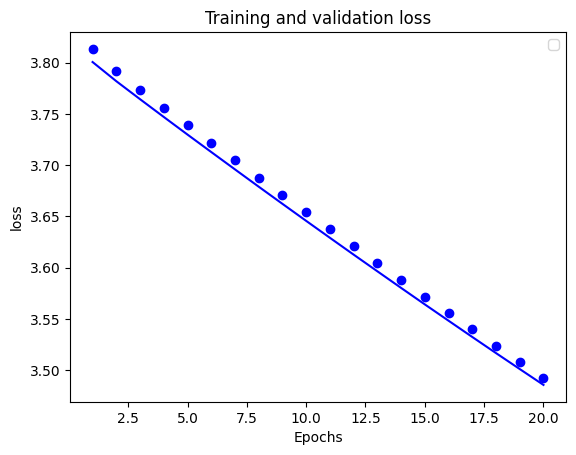

In [ ]:
#plotting the training and validation loss
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo')
plt.plot(epochs,val_loss,'b')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

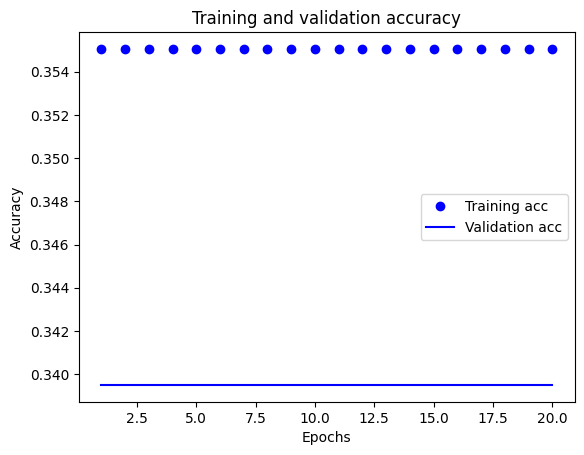

In [ ]:
#Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']  # Note: Use 'accuracy' instead of 'acc'
val_acc = history.history['val_accuracy']  # Note: Use 'val_accuracy' instead of 'val_acc'
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#retraining the model
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=12,batch_size=512,validation_data=(x_val,y_val))
results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/12
14/14 [==============================] - 3s 134ms/step - loss: 3.8134 - accuracy: 0.2213 - val_loss: 3.8005 - val_accuracy: 0.3395
Epoch 2/12
14/14 [==============================] - 1s 69ms/step - loss: 3.7918 - accuracy: 0.3551 - val_loss: 3.7819 - val_accuracy: 0.3395
Epoch 3/12
14/14 [==============================] - 1s 60ms/step - loss: 3.7736 - accuracy: 0.3551 - val_loss: 3.7643 - val_accuracy: 0.3395
Epoch 4/12
14/14 [==============================] - 1s 56ms/step - loss: 3.7561 - accuracy: 0.3551 - val_loss: 3.7469 - val_accuracy: 0.3395
Epoch 5/12
14/14 [==============================] - 1s 60ms/step - loss: 3.7387 - accuracy: 0.3551 - val_loss: 3.7298 - val_accuracy: 0.3395
Epoch 6/12
14/14 [==============================] - 1s 56ms/step - loss: 3.7215 - accuracy: 0.3551 - val_loss: 3.7127 - val_accuracy: 0.3395
Epoch 7/12
14/14 [==============================] - 1s 56ms/step - loss: 3.7044 - accuracy: 0.3551 - val_loss: 3.6957 - val_accuracy: 0.3395
Epoch 8/12
1

In [ ]:
results

[3.6151082515716553, 0.3615316152572632]

In [ ]:
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.21059661620658948

In [ ]:
#Generating preditions on new data
predictions=model.predict(x_test)

71/71 [==============================] - 1s 5ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
#handling labels and loss
y_train=np.array(train_labels)
y_test=np.array(test_labels)
